In [16]:
import pandas as pd 
import numpy as np


import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio 
from plotly.subplots import make_subplots 

import missingno as msno

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [17]:
df = pd.read_csv(r"D:\project\AirbnbAnalysis\NYC-Airbnb-2023.csv",low_memory = False)
df.head()

id                                         name  host_id  host_name  \
0  2595                        Skylit Midtown Castle     2845   Jennifer   
1  5121                              BlissArtsSpace!     7356      Garon   
2  5203           Cozy Clean Guest Room - Family Apt     7490  MaryEllen   
3  5178             Large Furnished Room Near B'way　     8967   Shunichi   
4  5136  Large Sunny Brooklyn Duplex, Patio + Garden     7378    Rebecca   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2           Manhattan     Upper West Side  40.80380  -73.96751   
3           Manhattan             Midtown  40.76457  -73.98317   
4            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 49  2022-06-21   
1     Private room     60              30                 50  2019-12-02   
2     Private room     75               2                118  2017-07-21   
3     Private room     68               2                575  2023-02-19   
4  Entire home/apt    275              60                  3  2022-08-10   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.30                               3               314   
1               0.30                               2               365   
2               0.72                               1                 0   
3               3.41                               1               106   
4               0.03                               1               181   

   number_of_reviews_ltm license  
0                      1     NaN  
1                      0     NaN  
2                      0     NaN  
3                     52     NaN  
4                      1     NaN

In [20]:
df.shape

(42931, 18)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

<Axes: >

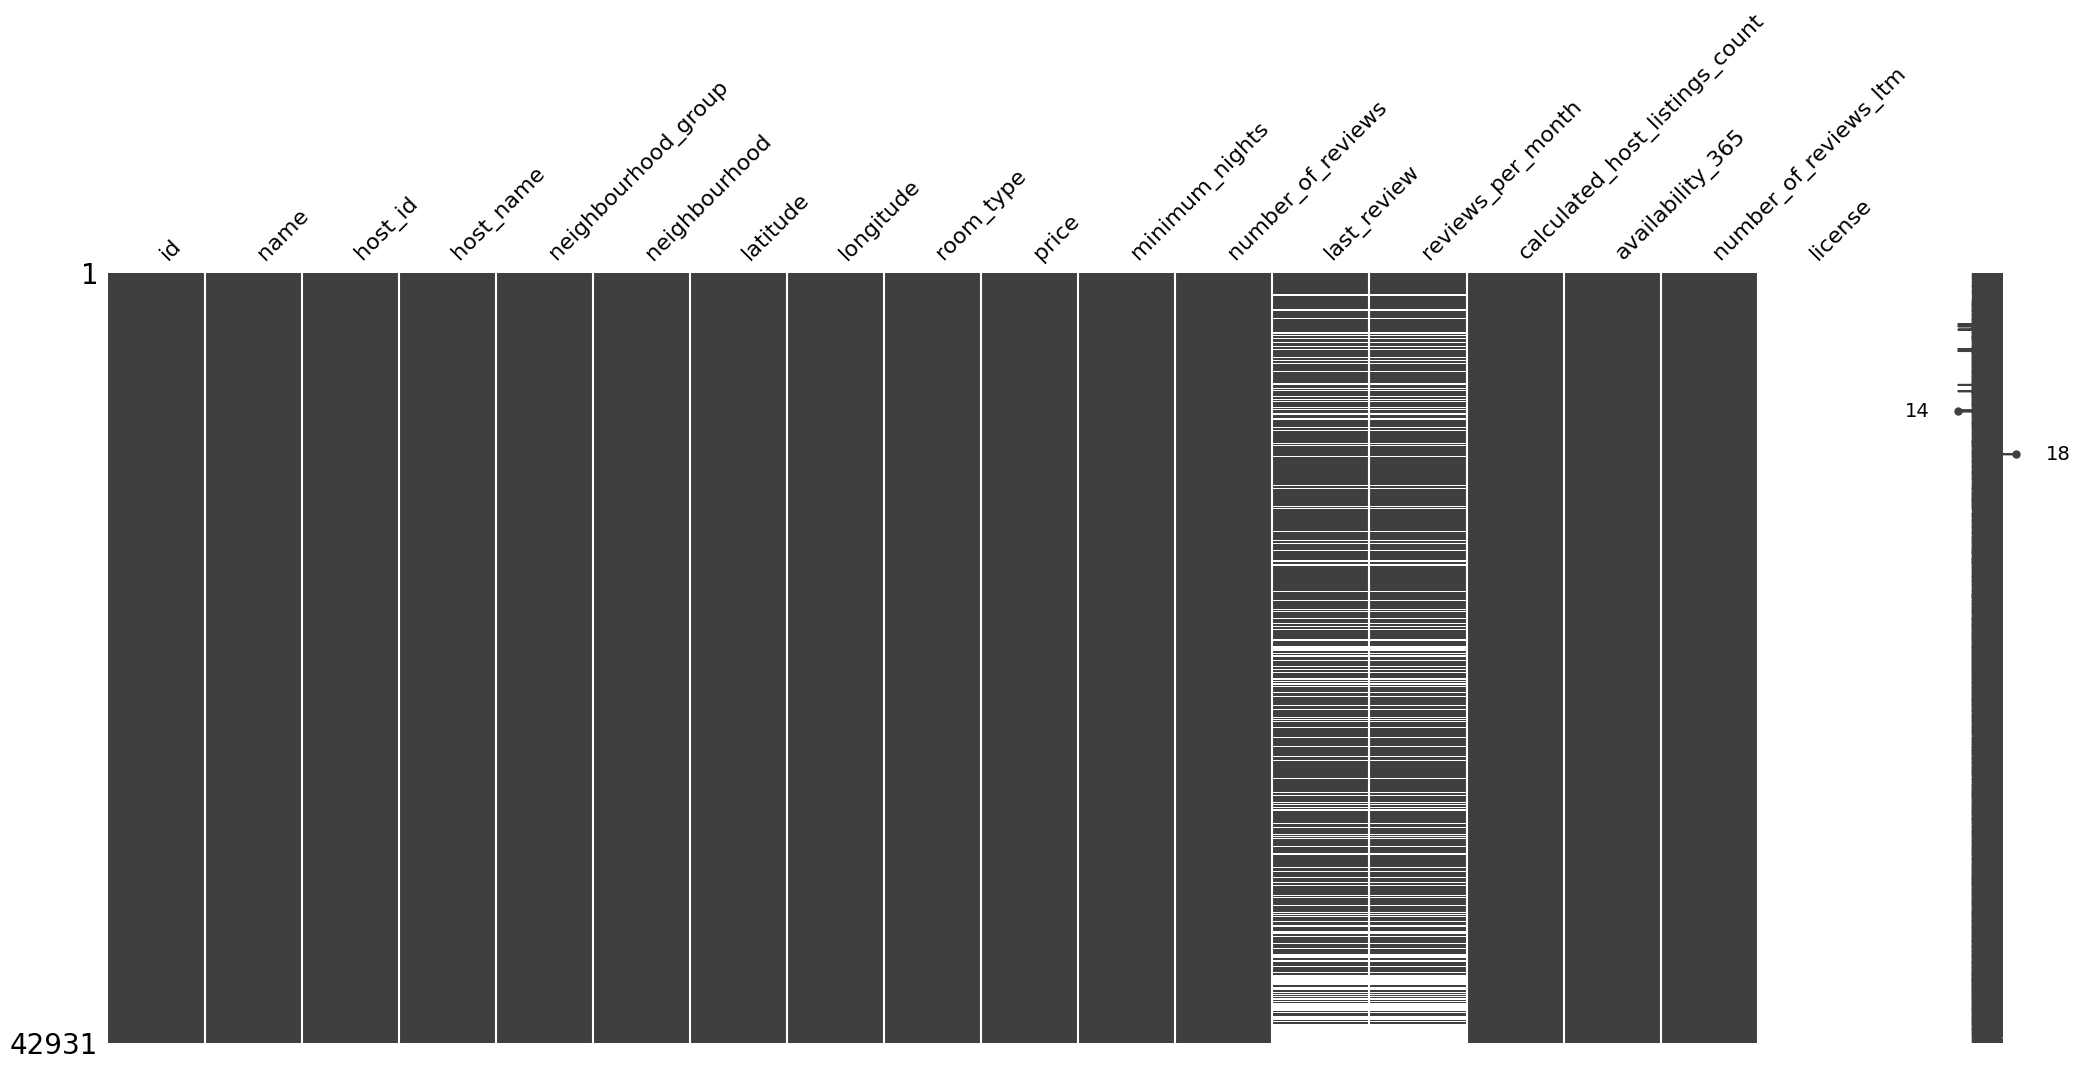

In [22]:
msno.matrix(df)

In [26]:
df.isna().sum()

name                                 12
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [27]:
df.reviews_per_month.mode()

0    0.02
Name: reviews_per_month, dtype: float64

In [29]:
df.reviews_per_month = df.reviews_per_month.fillna(0.02)

In [30]:
df.isna().sum()

name                                 12
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

Handling Dupicate

In [31]:
df.duplicated().any()

True

In [33]:
df[df.duplicated()].shape

(10, 15)

In [36]:
df = df.drop_duplicates()

In [38]:
df.shape

(42921, 15)

Handling the datatyypes

In [40]:
df.dtypes

name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [42]:
df['last_review'].unique()

array(['2022-06-21', '2019-12-02', '2017-07-21', ..., '2022-02-23',
       '2022-03-10', '2022-03-18'], dtype=object)

In [45]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [47]:
df['year'] = df['last_review'].dt.year
df['year'].unique()

array([2022., 2019., 2017., 2023., 2021.,   nan, 2020., 2011., 2013.,
       2014., 2018., 2016., 2015., 2012.])

In [49]:
df.dtypes

name                                      object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
year                                     float64
dtype: object

In [51]:
df['last_review'].unique()

array(['2022-06-21T00:00:00.000000000', '2019-12-02T00:00:00.000000000',
       '2017-07-21T00:00:00.000000000', ...,
       '2022-02-23T00:00:00.000000000', '2022-03-10T00:00:00.000000000',
       '2022-03-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [53]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [55]:
df['year'] = df['last_review'].dt.year
df['year'].unique()

array([2022., 2019., 2017., 2023., 2021.,   nan, 2020., 2011., 2013.,
       2014., 2018., 2016., 2015., 2012.])

In [57]:
df.dtypes

name                                      object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
year                                     float64
dtype: object

The describe

In [59]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  42921.000000  42921.000000  42921.000000    42921.000000   
mean      40.728267    -73.943658    200.189651       18.115165   
std        0.057646      0.056631    895.147544       27.464470   
min       40.500314    -74.251907      0.000000        1.000000   
25%       40.687480    -73.981750     75.000000        2.000000   
50%       40.724020    -73.952600    125.000000        7.000000   
75%       40.762298    -73.924020    200.000000       30.000000   
max       40.911380    -73.710870  99000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       42921.000000       42921.000000                    42921.000000   
mean           25.862002           0.893419                       24.057082   
std            56.621574           1.635675                       80.877199   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.020000                        1.000000   
50%             5.000000           0.240000                        1.000000   
75%            24.000000           1.170000                        4.000000   
max          1842.000000          86.610000                      526.000000   

       availability_365  number_of_reviews_ltm          year  
count      42921.000000           42921.000000  32626.000000  
mean         140.255865               7.738310   2021.225955  
std          141.994403              18.292005      2.289809  
min            0.000000               0.000000   2011.000000  
25%            0.000000               0.000000   2020.000000  
50%           89.000000               1.000000   2022.000000  
75%          289.000000               7.000000   2023.000000  
max          365.000000            1093.000000   2023.000000

Data visulation 

Hsting listing coount by room types

In [61]:
listings_room = df.groupby('room_type')['calculated_host_listings_count'].sum()
listings_room

room_type
Entire home/apt    555985
Hotel room           2809
Private room       471145
Shared room          2615
Name: calculated_host_listings_count, dtype: int64

In [63]:
bar_listings_room = px.bar(data_frame = listings_room,
                          color = ['Entire home/apt','Hotel room','Private room','Shared room'],
                          color_discrete_sequence = px.colors.sequential.Rainbow, 
                          text_auto = True)
bar_listings_room.show()

HOSting Listings count by neigh

In [65]:
listings_neighb = df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum()
listings_neighb

neighbourhood_group
Bronx              5103
Brooklyn         229209
Manhattan        645602
Queens           151472
Staten Island      1168
Name: calculated_host_listings_count, dtype: int64

In [67]:
bar_listings_neighb = px.bar(data_frame = listings_neighb,
                          color = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                          color_discrete_sequence = px.colors.sequential.thermal, 
                          text_auto = True)
bar_listings_neighb.show()

price Dribtion by room type

In [69]:
box_price_room = px.box(data_frame = df,
                         x = df['room_type'],
                         y = df['price'],
                       color = 'room_type',
                       title = 'Price Distribution by Room Type')
box_price_room.show()

Price distribution by neighbourhood groups

In [71]:
scatter_price_neighb = px.scatter(data_frame = df,
                            x = df['neighbourhood_group'],
                            y = df['price'],
                            color = 'neighbourhood_group',
                            title = 'Price Distribution by Room Type')
scatter_price_neighb.show()

Heat map

In [73]:
corr_table = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',
                 'availability_365','number_of_reviews_ltm']].corr()
corr_table

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.020675          -0.016406   
minimum_nights                 -0.020675        1.000000          -0.138867   
number_of_reviews              -0.016406       -0.138867           1.000000   
reviews_per_month              -0.009522       -0.240618           0.610516   
calculated_host_listings_count  0.026185        0.119949          -0.111158   
availability_365                0.027153       -0.092412           0.046174   
number_of_reviews_ltm          -0.008535       -0.216611           0.652936   

                                reviews_per_month  \
price                                   -0.009522   
minimum_nights                          -0.240618   
number_of_reviews                        0.610516   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.120731   
availability_365                         0.138872   
number_of_reviews_ltm                    0.858727   

                                calculated_host_listings_count  \
price                                                 0.026185   
minimum_nights                                        0.119949   
number_of_reviews                                    -0.111158   
reviews_per_month                                    -0.120731   
calculated_host_listings_count                        1.000000   
availability_365                                      0.126450   
number_of_reviews_ltm                                -0.097346   

                                availability_365  number_of_reviews_ltm  
price                                   0.027153              -0.008535  
minimum_nights                         -0.092412              -0.216611  
number_of_reviews                       0.046174               0.652936  
reviews_per_month                       0.138872               0.858727  
calculated_host_listings_count          0.126450              -0.097346  
availability_365                        1.000000               0.122662  
number_of_reviews_ltm                   0.122662               1.000000

<Axes: >

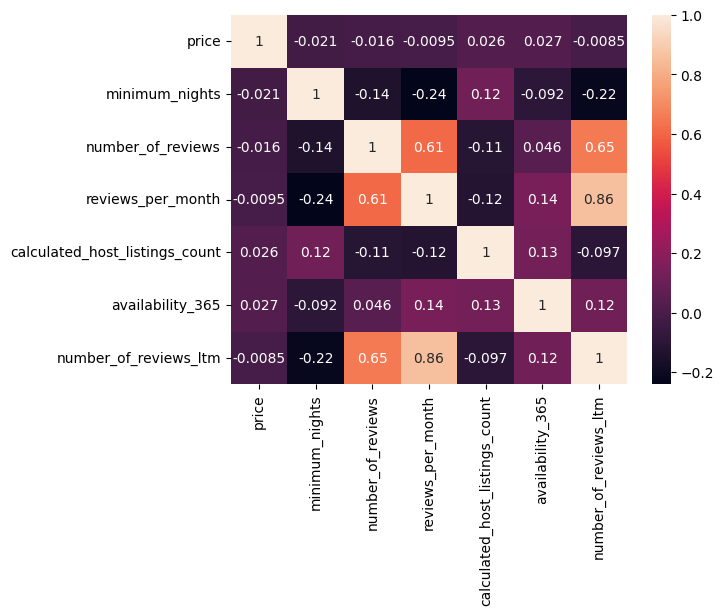

In [75]:
heat_map = sns.heatmap(data = corr_table, annot = True)
heat_map

Geographical map

In [77]:
pio.templates.default = "plotly_dark"

In [79]:
location = df[['latitude','longitude','neighbourhood_group']]
location

latitude  longitude neighbourhood_group
0      40.753560 -73.985590           Manhattan
1      40.685350 -73.955120            Brooklyn
2      40.803800 -73.967510           Manhattan
3      40.764570 -73.983170           Manhattan
4      40.662650 -73.994540            Brooklyn
...          ...        ...                 ...
42926  40.718976 -73.963985            Brooklyn
42927  40.721703 -73.981473           Manhattan
42928  40.688700 -73.907650            Brooklyn
42929  40.616911 -74.164652       Staten Island
42930  40.713091 -73.957205            Brooklyn

[42921 rows x 3 columns]

In [81]:
geo_map = px.scatter(location, x = "longitude", y = "latitude", color = "neighbourhood_group", 
                     color_discrete_sequence = px.colors.sequential.Turbo )

# Add a title and labels
geo_map.update_layout(title = "Geographical Distribution of Listings by Neighbourhood",
                  xaxis_title = "Longitude",
                  yaxis_title = "Latitude")

# Show the plot
geo_map.show()

Mean price Distribution by neighbourhood groups and room types

In [83]:
av_price_room = df.groupby("room_type")["price"].mean()
df_av_room = pd.DataFrame(av_price_room).reset_index()
column_names = ["room_type", "price"]
df_av_room.columns = column_names
df_av_room

room_type       price
0  Entire home/apt  249.255365
1       Hotel room  309.959391
2     Private room  134.696234
3      Shared room  126.250000

In [85]:
av_price_neighb = df.groupby("neighbourhood_group")["price"].mean()
df_av_neighb = pd.DataFrame(av_price_neighb).reset_index()
column_names = ["neighbourhood_group", "price"]
df_av_neighb.columns = column_names
df_av_neighb

neighbourhood_group       price
0               Bronx  117.512123
1            Brooklyn  162.766829
2           Manhattan  268.118540
3              Queens  128.173655
4       Staten Island  309.037296

Text(0, 0.5, 'Average Price')

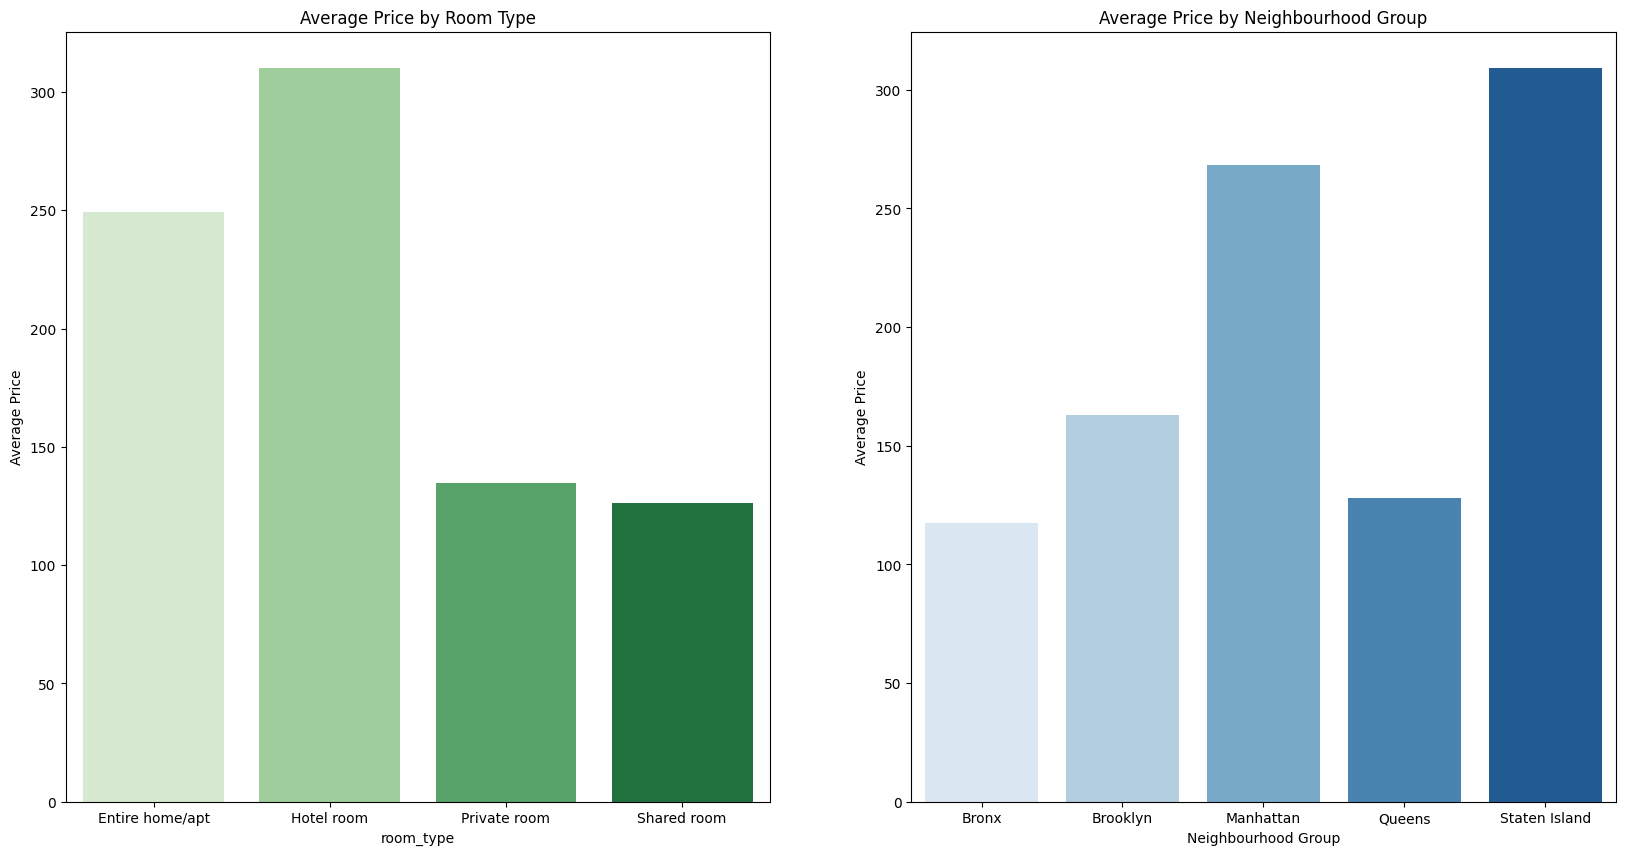

In [87]:
# Making subplots 
# figsize represents adjusts the size of the figure
# ax1, ax2 reprsents tupel that contains two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Average price by room type
# Creating a bar plot
sns.barplot(data = df_av_room, x = df_av_room["room_type"],
            y = df_av_room["price"], 
            ax = ax1, palette="Greens",
            label="Average Price by Room Type")

ax1.set_title("Average Price by Room Type")
ax1.set_ylabel("Average Price")

# Average price by neighbourhood group
# Creating a bar plot
sns.barplot(data = df_av_neighb, x = "neighbourhood_group", y = "price", 
            ax = ax2, palette = "Blues",
            label = "Average Price by Neighbourhood Group")

ax2.set_title("Average Price by Neighbourhood Group")
ax2.set_xlabel("Neighbourhood Group")
ax2.set_ylabel("Average Price")


NUMBER of reviews by rom types and neighbour hood location 

In [89]:
rev_room_type = df.groupby("room_type")["number_of_reviews"].sum()
df_rev_room_type = pd.DataFrame(rev_room_type).reset_index()
column_names = ["room_type", "number_of_reviews"]
df_rev_room_type.columns = column_names
df_rev_room_type

room_type  number_of_reviews
0  Entire home/apt             645605
1       Hotel room              10292
2     Private room             442186
3      Shared room              11940

In [92]:
rev_neighb = df.groupby("neighbourhood_group")["number_of_reviews"].sum()
df_rev_neighb = pd.DataFrame(rev_neighb).reset_index()
column_names = ["neighbourhood_group", "number_of_reviews"]
rev_neighb.columns = column_names
df_rev_neighb

neighbourhood_group  number_of_reviews
0               Bronx              43047
1            Brooklyn             466643
2           Manhattan             376780
3              Queens             208344
4       Staten Island              15209

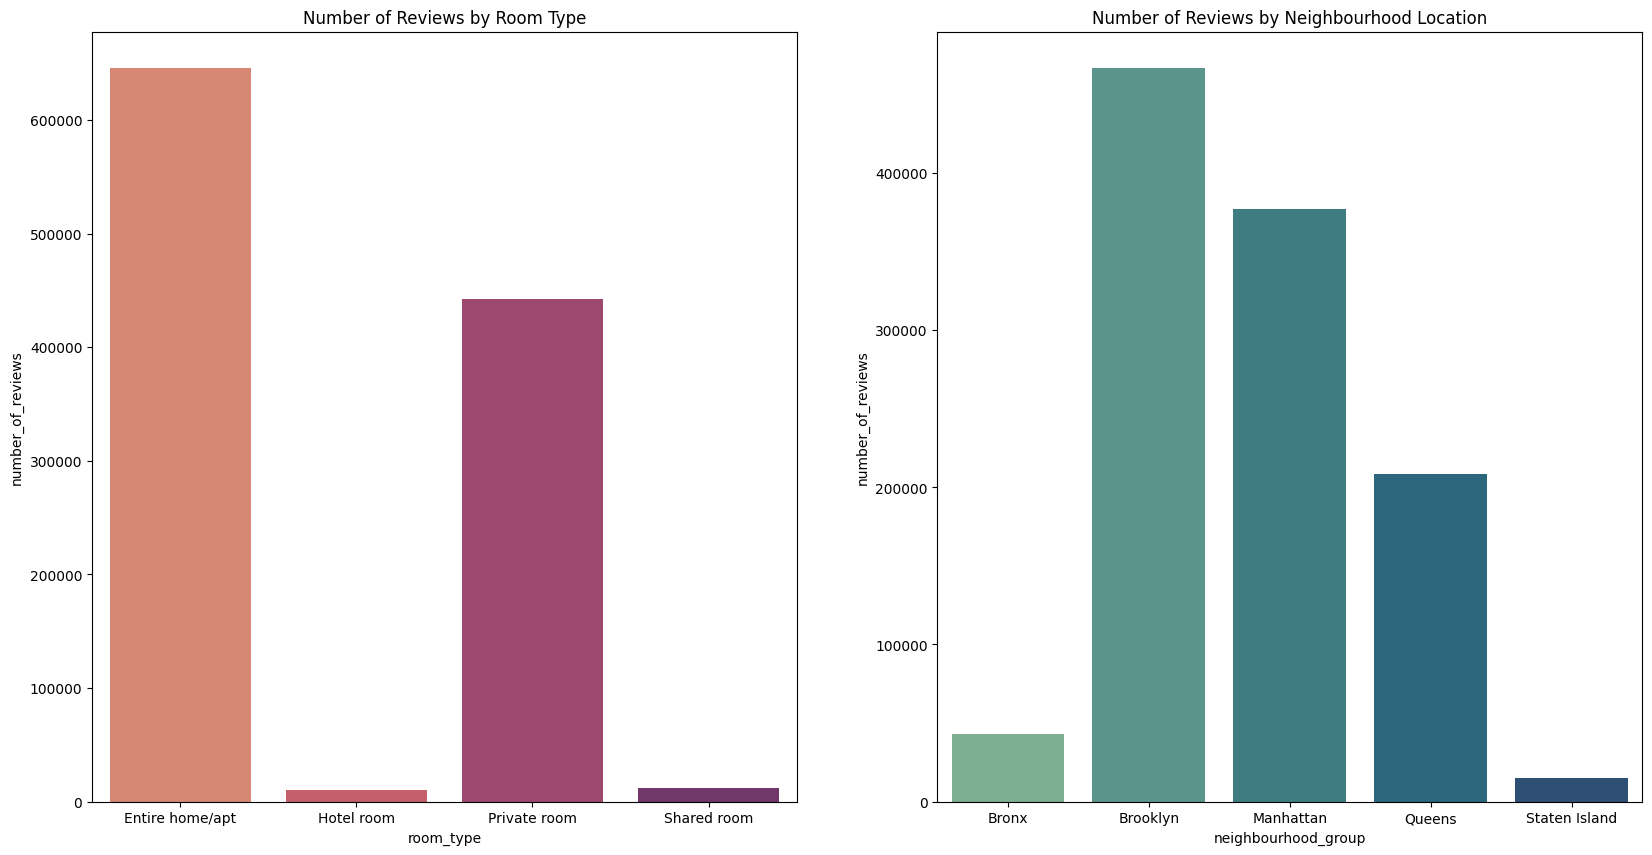

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(data=df_rev_room_type, x="room_type", y="number_of_reviews", ax=ax1, palette = 'flare')
ax1.set_title("Number of Reviews by Room Type")

sns.barplot(data=df_rev_neighb, x="neighbourhood_group", y="number_of_reviews", ax=ax2, palette = 'crest')
ax2.set_title("Number of Reviews by Neighbourhood Location")

plt.show()


Avaliablity of romms

In [95]:
room_365 = df.groupby('room_type')['availability_365'].sum()
room_365

room_type
Entire home/apt    3468510
Hotel room           40942
Private room       2417111
Shared room          93359
Name: availability_365, dtype: int64

In [97]:
col = ['Entire home/apt', 'Hotel room','Private Room', 'Shared Room']
bar_room_365 = px.bar(data_frame = room_365,
                     color = col,
                     title = 'Availability of Rooms for 365 Days',
                     text_auto = True,
                     color_discrete_sequence = px.colors.sequential.haline)
bar_room_365.show()

Price by year

In [99]:
price_year = df.groupby("year")["price"].sum()
df_price_year = pd.DataFrame(price_year).reset_index()
column_names = ["year", "price"]
df_price_year.columns = column_names
df_price_year

year    price
0   2011.0      844
1   2012.0     1696
2   2013.0     6430
3   2014.0    16068
4   2015.0   127204
5   2016.0   191224
6   2017.0   155581
7   2018.0   204155
8   2019.0   338396
9   2020.0   380013
10  2021.0   288765
11  2022.0  1963554
12  2023.0  2217188

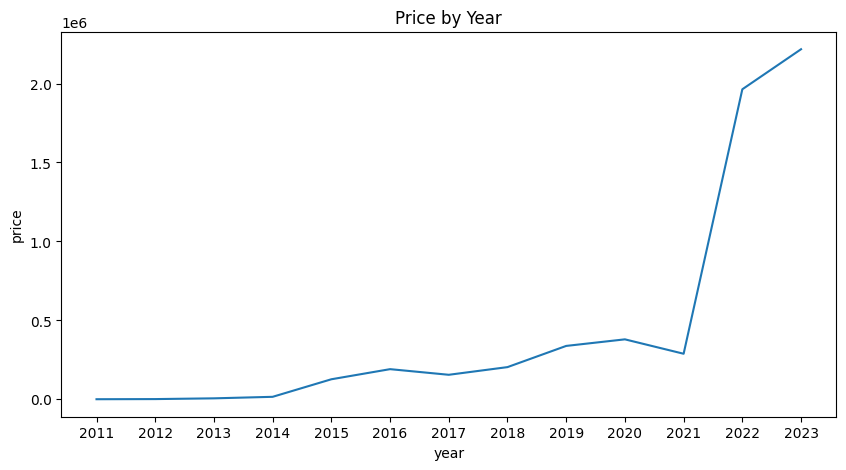

In [100]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot(data=df_price_year, x="year", y="price")
ax.set_xticks(list(range(2011, 2024)))

plt.rcParams["figure.figsize"] = (10, 4)

plt.title("Price by Year")
plt.show()


Top Five Listings by Host names

In [102]:
host_list = df.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending = False)[:5]
host_list

host_name
Blueground    276676
Eugene        155242
RoomPicks     127313
June           49300
Hiroki         42849
Name: calculated_host_listings_count, dtype: int64

In [104]:
name = ['Blueground','Eugene','RoomPicks','June','Hiroki']
bar_host_list = px.bar(data_frame = host_list,
                       color = name,
                       title = 'Top Five Listings by Host names',
                      color_discrete_sequence = px.colors.sequential.Turbo)
bar_host_list.show()

Word cloud for host names

In [106]:
pio.templates.default = "plotly_white"

In [108]:
names = ' '.join(df['host_name'].astype(str))

In [110]:
# WordCloud() is a class used to generate word clouds
# generate() takes list of words as input to generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='black').generate(names)


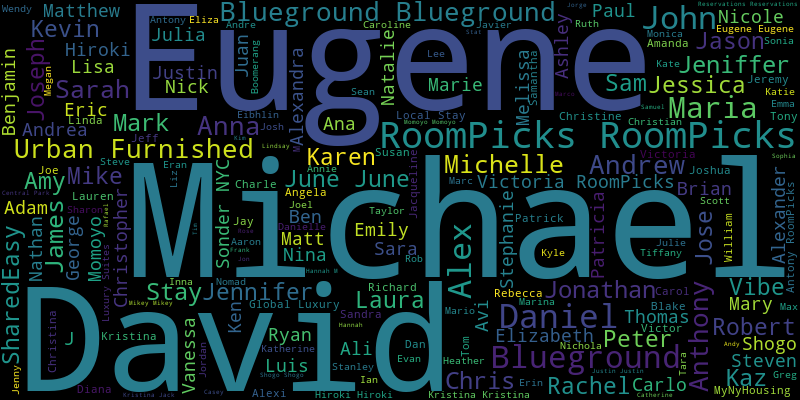

In [112]:
# imshow() is used to display the wordcloud
fig = px.imshow(wordcloud.to_array())
fig.update_layout(title_text='Word Cloud for host names')
# showticklabels specify whether tick labels should be shown or not
fig.update_xaxes(showticklabels = False)  
fig.update_yaxes(showticklabels = False)
fig.show()


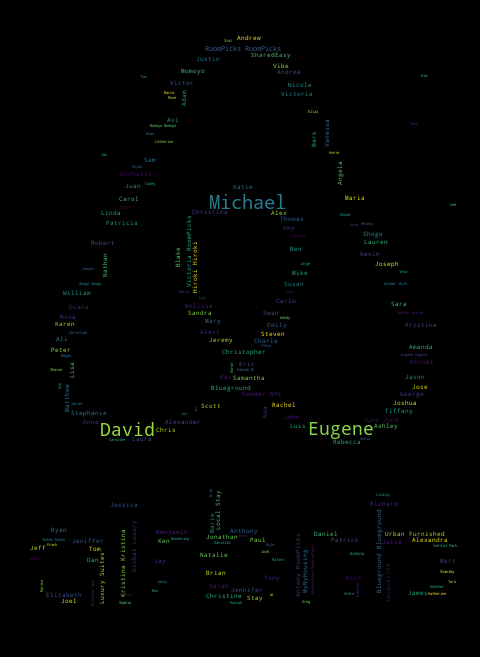

In [114]:
mask_image = np.array(Image.open(r"D:\project\AirbnbAnalysis\3.png"))
# Creating a wordcloud object using the mask_image
wordcloud = WordCloud(mask = mask_image, background_color ='black').generate(names)
# ImageColorGenerator() is used to map words in wordcloud to colors of the mask image
image_colors = ImageColorGenerator(mask_image)
# Converting wordcloud to array
wordcloud_image = wordcloud.to_array()

fig = px.imshow(wordcloud_image)
fig.update_layout(title_text ='Word Cloud with Mask Image')
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()
